In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Q1

In [51]:
data=pd.read_csv("dea_data.csv")

### Q2

In [22]:
data.head()

,Gene,Control1,Control2,Control3,Control4,Control5,Control6,Control7,Control8,Control9,...,Treatment16,Treatment17,Treatment18,Treatment19,Treatment20,Treatment21,Treatment22,Treatment23,Treatment24,Treatment25
0,Gene1,56,97,19,76,65,25,87,91,79,...,55,59,68,7,55,11,25,77,43,22
1,Gene2,8,93,64,18,13,94,57,6,88,...,91,66,44,89,84,86,57,28,30,93
2,Gene3,64,45,33,19,49,69,93,75,13,...,82,7,5,9,94,18,31,13,83,19
3,Gene4,94,46,81,55,67,56,8,98,27,...,74,76,31,13,66,41,55,48,28,83
4,Gene5,63,36,92,56,66,62,56,16,43,...,77,63,74,84,97,7,24,63,40,23


### Q3

In [23]:
control_cols= [i for i in data.columns if "Control" in i]
print("Column of Controls: ")
print(control_cols)

Column of Controls: 
['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Control9', 'Control10', 'Control11', 'Control12', 'Control13', 'Control14', 'Control15', 'Control16', 'Control17', 'Control18', 'Control19', 'Control20', 'Control21', 'Control22', 'Control23', 'Control24', 'Control25']


### Q4

In [45]:
control_mean=data[control_cols].mean(axis=1) 
print(control_mean)

0     53.52
1     47.08
2     45.16
3     51.44
4     48.04
      ...  
95    51.56
96    49.32
97    45.40
98    58.08
99    51.72
Length: 100, dtype: float64


### Q5

In [46]:
treatment_cols= [i for i in data.columns if "Treatment" in i]
average_treatment=data[treatment_cols].mean(axis=1)
print(average_treatment)

0     54.88
1     63.28
2     47.92
3     53.56
4     53.24
      ...  
95    45.28
96    52.36
97    64.40
98    55.60
99    48.00
Length: 100, dtype: float64


### Q6

In [63]:
# print(average_treatment.max())
sorted_treat= average_treatment.sort_values()
max_treat= sorted_treat[::-1].head(1)
print(max_treat)

97    64.4
dtype: float64


### Q7

In [64]:
difference= (average_treatment - control_mean)
difference

0      1.36
1     16.20
2      2.76
3      2.12
4      5.20
      ...  
95    -6.28
96     3.04
97    19.00
98    -2.48
99    -3.72
Length: 100, dtype: float64

### Q8

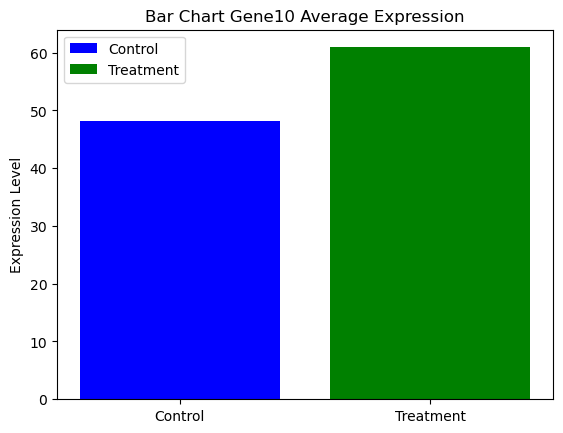

In [71]:
gene="Gene10"
gene_data= data[data["Gene"] == gene]

control_mean= gene_data[control_cols].mean(axis=1).values[0]
treatment_mean= gene_data[treatment_cols].mean(axis=1).values[0]

plt.bar("Control",control_mean, color="blue", label="Control")
plt.bar("Treatment",treatment_mean, color="green", label="Treatment")
plt.title(f"Bar Chart {gene} Average Expression")
plt.ylabel("Expression Level")
plt.legend()
plt.show()

### Q9

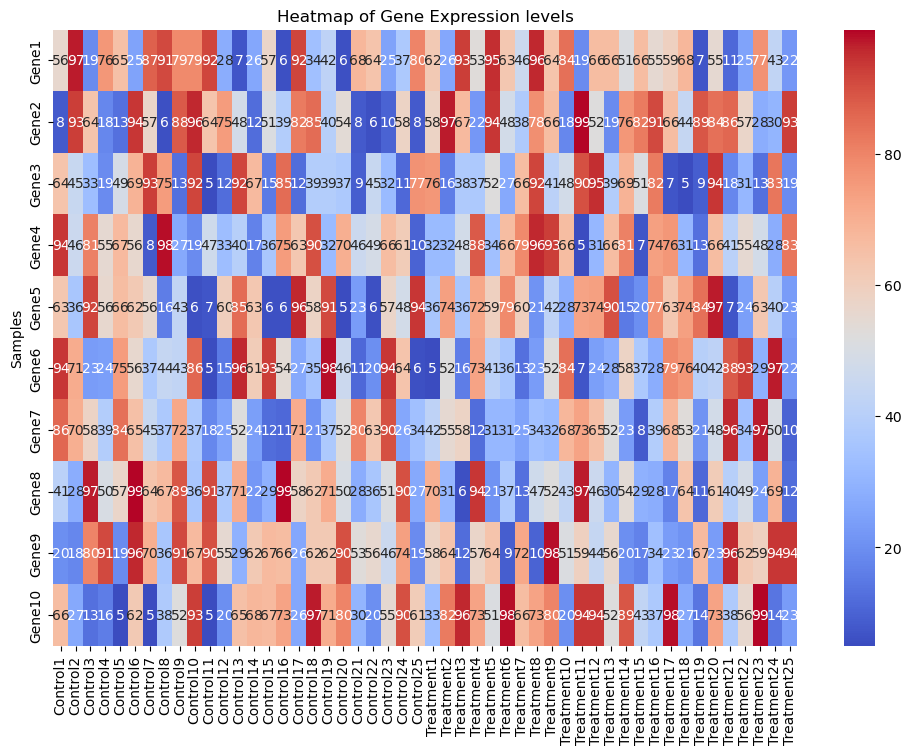

In [70]:
heatmap_data=data.set_index('Gene')
heatmap= heatmap_data.head(10)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap,cmap="coolwarm",annot=True)
plt.title("Heatmap of Gene Expression levels")
plt.ylabel('Genes')
plt.ylabel('Samples')
plt.show()

### Q10

In [90]:
unregulated = treatment_mean < control_mean
unregulated

False

### Q11

In [87]:
unregulated = treatment_mean > control_mean

KeyError: 60.92

### Q12

In [88]:
genes= ["Gene1","Gene2","Gene3","Gene4","Gene5"]
gene_data= data[data["Gene"] == genes]

control_data=gene_data[['Control1','Control2','Control3','Control4','Control5']].values.flatten()
treatment_data=gene_data[['Treatment1','Treatment2','Treatment3','Treatment4','Treatment5']].values.flatten()



plt.figure(figsize=(10,6))
sns.boxplot(data=[control_data,treatment_data], palette="Set2")

plt.xticks([0,1], ['Control','Treatment'])
plt.title(f"Box Plot for {gene}")
plt.ylabel('Expression level')
plt.show()

ValueError: ('Lengths must match to compare', (100,), (5,))

### Q13